### Numpy basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [19]:
m = np.arange(12).reshape((3,4))
print(f"Matrix:\n{m}")

print("Row means:", np.mean(m, axis=1))         
print("Column means:", np.mean(m, axis=0))     
print("Flattened matrix mean:", np.mean(m))

Matrix:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Row means: [1.5 5.5 9.5]
Column means: [4. 5. 6. 7.]
Flattened matrix mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using x nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [20]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print()
print("Using the numpy.outer function:")
print(np.outer(u,v))

print()
print("Using list comprehension:")
print(np.array( [x*b for x in u for b in v] ).reshape(4,4))

print()
print("Using broadcasting operations:")
print(np.tile(u,(4,1)).T * np.tile(v,(4,1)))



Using the numpy.outer function:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using list comprehension:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create x 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [21]:
# Set the seed
np.random.seed(int("0b10000111100101100", 2))

# Generate x 10x6 matrix with entries sampled from x uniform distribution [0, 1)
# np.random.random((10, 6)) works exactly the same
matrix = np.random.rand(10, 6)

# beautiful trick 
# what this does is:
# 1) creates x boolean matrix with True entries where the condition is satisfied and False entries otherwise
# 2) logically invert this matrix so that when the condition is satisfied the entries are False (True otherwise)
# 3) convert True->1 and False->0
# thus we have x matrix with entries set to 0 if the original entry is < 0.1 and 1 otherwise
mask = ( ~(matrix < 0.1) ).astype(int) # instead of using ~ I could have set the condition to be >= 0.1 

# we obtain the asked result simpy by multiplying the original matrix with our mask
# note that this multiplication is performed element-wise!
print(matrix*mask)

[[0.53109224 0.35676397 0.51311614 0.32530468 0.45724967 0.        ]
 [0.45984102 0.35495298 0.98303443 0.42366256 0.60327198 0.32626615]
 [0.22716059 0.39137194 0.89751994 0.61895416 0.4627904  0.90580501]
 [0.         0.48182862 0.48369823 0.         0.43196146 0.47942225]
 [0.12765677 0.85099476 0.30138853 0.52095858 0.30261294 0.61947151]
 [0.         0.8948539  0.40831483 0.94424549 0.30643524 0.21534613]
 [0.74363537 0.96310086 0.59538542 0.26436953 0.91000625 0.35140741]
 [0.49667844 0.39227232 0.23751883 0.44409978 0.9325341  0.99649267]
 [0.96801978 0.56053581 0.92947021 0.26774681 0.76444875 0.35747954]
 [0.50742656 0.21108572 0.80058472 0.7808337  0.77064073 0.83570483]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make x plot showing the sin and cos functions and indicate where they are close

List of x points that satisfy |sin(x)-cos(x)| < 0.1
[]


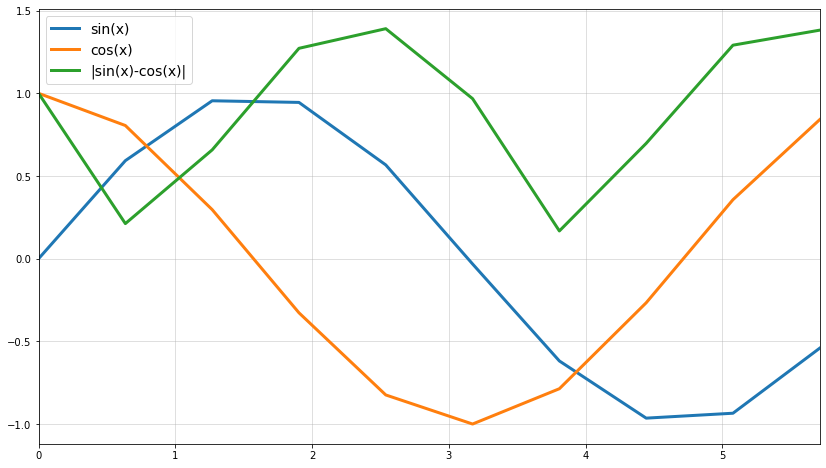

List of x points that satisfy |sin(x)-cos(x)| < 0.1
[0.09822946 0.08936239 0.08049178 0.07161801 0.0627414  0.05386231
 0.0449811  0.03609811 0.0272137  0.01832821 0.009442   0.00055542
 0.00833119 0.01721747 0.02610307 0.03498763 0.04387082 0.05275227
 0.06163164 0.07050858 0.07938273 0.08825375 0.09712128 0.09778619
 0.08891894 0.08004817 0.07117424 0.0622975  0.0534183  0.04453699
 0.03565392 0.02676945 0.01788392 0.00899768 0.00011108 0.00877552
 0.01766177 0.02654732 0.03543183 0.04431493 0.05319629 0.06207555
 0.07095235 0.07982636 0.08869721 0.09756456]


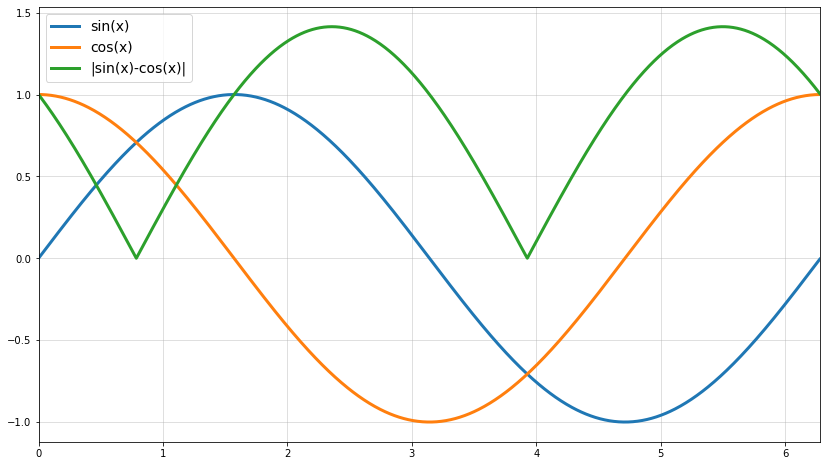

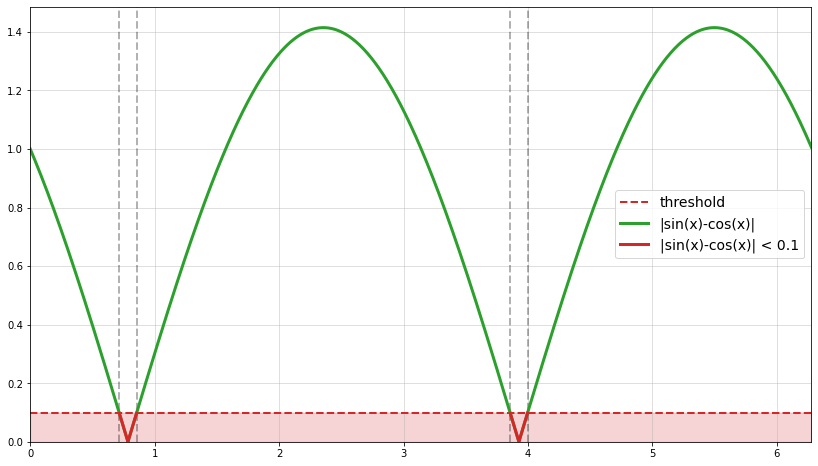

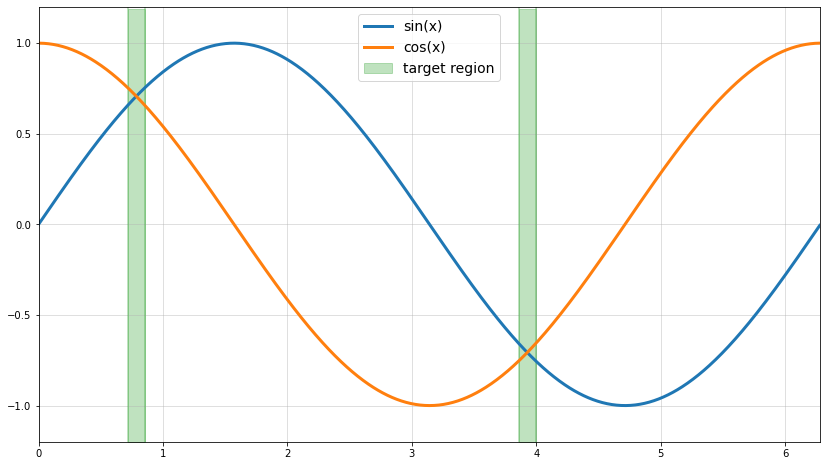

In [2]:
from math import pi

def mask(a, b, upper_bound=0.1, lower_bound=0):
    return a[(b<upper_bound) & (b>lower_bound)]

# array of 100 numbers from 0 to 2pi (included)
x = np.linspace(0, 2*pi, 100, endpoint=True) # note that by default endpoint is set to True - I"ve writted it explicitely to stress that 2pi is included

# slice one element every 10
x = x[::10] 
# reverse the array 
x = x[::-1] 

# explicitly compute sine and cosine
sine = np.sin(x)
cosine = np.cos(x)

# explicitly compute the absolute value of the difference of the two
abs_val = np.abs(sine-cosine)

# print the points that satisfy the condition
print("List of x points that satisfy |sin(x)-cos(x)| < 0.1")
print(mask(abs_val, abs_val, 0.1))


fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

# threshold
# ax.axhline(y=0.1, lw=2, linestyle="dashed", color="#d62728", label="threshold")
# ax.fill_between(x, 0.1, color="#d62728", alpha=0.2)

ax.plot(x, sine, lw=3, label="sin(x)")
ax.plot(x, cosine, lw=3, label="cos(x)")
ax.plot(x, abs_val, lw=3, label="|sin(x)-cos(x)|")

ax.set_xlim(x.min(), x.max())

ax.legend(fontsize=14)
plt.show()

# WE NEED MORE POINTS!

# array of 10000 numbers from 0 to 2pi (included)
x = np.linspace(0, 2*pi, 10000, endpoint=True) # note that by default endpoint is set to True - I"ve writted it explicitely to stress that 2pi is included

# slice one element every 10
x = x[::10] 
# reverse the array 
x = x[::-1] 

# explicitly compute sine and cosine
sine = np.sin(x)
cosine = np.cos(x)

# explicitly compute the absolute value of the difference of the two
abs_val = np.abs(sine-cosine)

# print the points that satisfy the condition
print("List of x points that satisfy |sin(x)-cos(x)| < 0.1")
print(mask(abs_val, abs_val, 0.1))


fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

# threshold
# ax.axhline(y=0.1, lw=2, linestyle="dashed", color="#d62728", label="threshold")
# ax.fill_between(x, 0.1, color="#d62728", alpha=0.2)

ax.plot(x, sine, lw=3, label="sin(x)")
ax.plot(x, cosine, lw=3, label="cos(x)")
ax.plot(x, abs_val, lw=3, label="|sin(x)-cos(x)|")

ax.set_xlim(x.min(), x.max())

ax.legend(fontsize=14)
plt.show()

# now that we have some points to work with let's get into more visualization

abs_val_msk = mask(abs_val, abs_val, 0.1)

x_msk = mask(x, abs_val, 0.1)

fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

ax.axhline(y=0.1, lw=2, linestyle="dashed", color="#d62728", label="threshold")
ax.fill_between(x, 0.1, color="#d62728", alpha=0.2)

ax.axvline(x=mask(x_msk, x_msk, 1/2*pi).min(), lw=2, ls="--", color="k", alpha=0.3)
ax.axvline(x=mask(x_msk, x_msk, 1/2*pi).max(), lw=2, ls="--", color="k", alpha=0.3)

ax.axvline(x=mask(x_msk, x_msk, 2*pi, 1/2*pi).min(), lw=2, ls="--", color="k", alpha=0.3)
ax.axvline(x=mask(x_msk, x_msk, 2*pi, 1/2*pi).max(), lw=2, ls="--", color="k", alpha=0.3)

ax.plot(x, abs_val, lw=3, color="#2ca02c", label="|sin(x)-cos(x)|")
ax.plot(mask(x_msk, x_msk, 1/2*pi), mask(abs_val_msk, x_msk, 1/2*pi), lw=3, color="#d62728", label="|sin(x)-cos(x)| < 0.1")
ax.plot(mask(x_msk, x_msk, 2*pi, 1/2*pi), mask(abs_val_msk, x_msk, 2*pi, 1/2*pi), lw=3, color="#d62728")

ax.set_xlim(x.min(), x.max())
ax.set_ylim(0)

ax.legend(fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

ax.axvline(x=mask(x_msk, x_msk, 1/2*pi).min(), lw=2, ls="-", color="#2ca02c", alpha=0.3)
ax.axvline(x=mask(x_msk, x_msk, 1/2*pi).max(), lw=2, ls="-", color="#2ca02c", alpha=0.3)
ax.fill_betweenx(np.arange(-1.2, 1.2, 0.01), mask(x_msk, x_msk, 1/2*pi).min(), mask(x_msk, x_msk, 1/2*pi).max(), color="#2ca02c", alpha=0.3, label="target region")

ax.axvline(x=mask(x_msk, x_msk, 2*pi, 1/2*pi).min(), lw=2, ls="-", color="#2ca02c", alpha=0.3)
ax.axvline(x=mask(x_msk, x_msk, 2*pi, 1/2*pi).max(), lw=2, ls="-", color="#2ca02c", alpha=0.3)
ax.fill_betweenx(np.arange(-1.2, 1.2, 0.01), mask(x_msk, x_msk, 2*pi, 1/2*pi).min(), mask(x_msk, x_msk, 2*pi, 1/2*pi).max(), color="#2ca02c", alpha=0.3)

ax.plot(x, sine, lw=3, label="sin(x)")
ax.plot(x, cosine, lw=3, label="cos(x)")

ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.2, 1.2)

ax.legend(fontsize=14)
plt.show()


5\. Create x matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [27]:
a = np.tile(np.arange(1,11),(10,1))
m_table = a*a.T                             
print(m_table)
print("Trace:", np.trace(m_table))
print("Antidiagonal:", np.diag(m_table[:][::-1])) # just reverse each row and take the diagonal
offset = 1
print(f"Diagonal (offset = {offset}):", np.diag(m_table, offset))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace: 385
Antidiagonal: [10 18 24 28 30 30 28 24 18 10]
Diagonal (offset = 1): [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create x grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct x 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

Distance matrix in miles:

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Distance matrix in kilometers:

[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.500

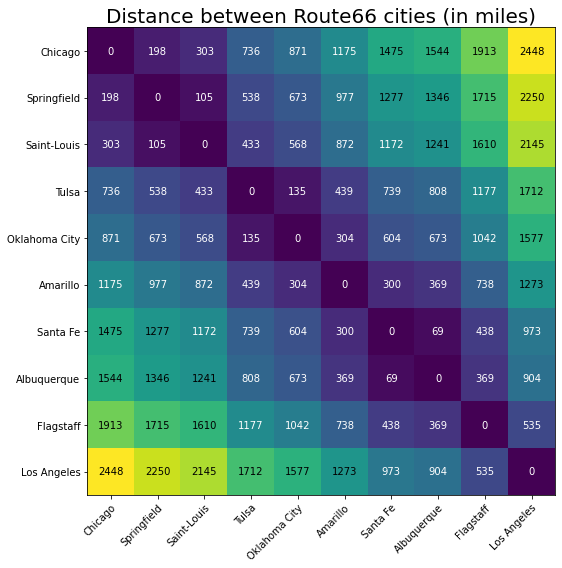

In [33]:
def compute_distance(positions):
    """this function take as input the array of positions and computes a matrix of distances"""
    distance = np.tile( positions, (len(positions), 1) )    # create the matrix
    return np.abs(distance - distance.T)                    # compute the distance 

MILE_TO_KM = 1.60934 # miles to km conversion factor

cities = np.array([
    "Chicago", 
    "Springfield", 
    "Saint-Louis", 
    "Tulsa", 
    "Oklahoma City", 
    "Amarillo", 
    "Santa Fe", 
    "Albuquerque", 
    "Flagstaff", 
    "Los Angeles"
])

positions_miles = np.array([
    0, 
    198, 
    303, 
    736, 
    871, 
    1175, 
    1475, 
    1544, 
    1913, 
    2448
])

# use the function defined above to get the matrix of distances
distances2D_miles = compute_distance(positions_miles)
# numpy scalar multiplication is great!
distances2D_km = distances2D_miles * MILE_TO_KM

print("Distance matrix in miles:\n")
print(distances2D_miles)
print()
print("Distance matrix in kilometers:\n")
print(distances2D_km)

# NOTE THAT THE OUTPUT IS QUITE HARD TO UNDERSTAND
# of course plots are WAY better when it comes to visualization
# let's translate the matrix into a colormap!

fig, ax = plt.subplots(figsize=(8,8))

im = ax.imshow(distances2D_miles)

threshold = im.norm(distances2D_miles.max())/2.

ax.set_xticks(np.arange(len(cities)))
ax.set_yticks(np.arange(len(cities)))
ax.set_xticklabels(cities)
ax.set_yticklabels(cities)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

textcolors = ["white", "black"]
for i in range(len(cities)):
    for j in range(len(cities)):
        text = ax.text(j, i, distances2D_miles[i, j], ha="center", va="center", color=textcolors[int(im.norm(distances2D_miles[i, j]) > threshold)])
        
ax.set_title("Distance between Route66 cities (in miles)", fontsize=20)

fig.tight_layout()
plt.show()



7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with x sieve (mask).
  * Constract x shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)


Using no optimization:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Using the sieve of Eratosthenes:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


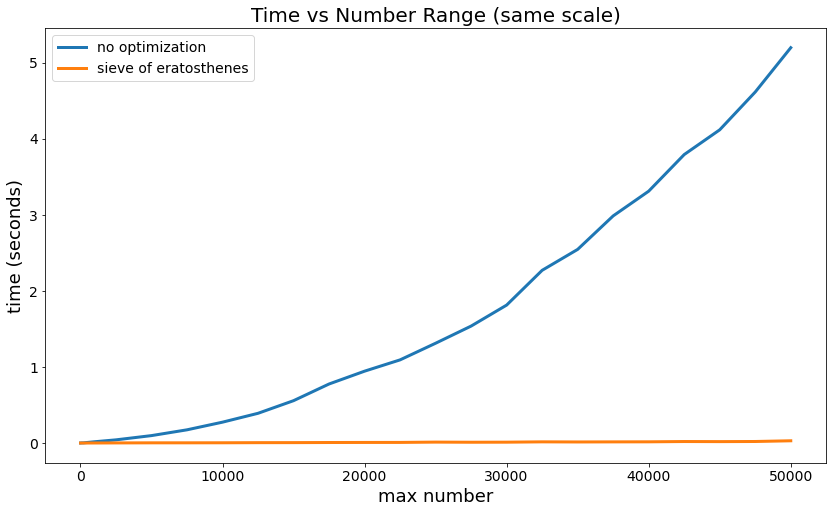

As expected, the optimized implementation is way faster than the non-optimized one!
The divide between the two becomes not negligible when N gets larger than a few tens of thousands.


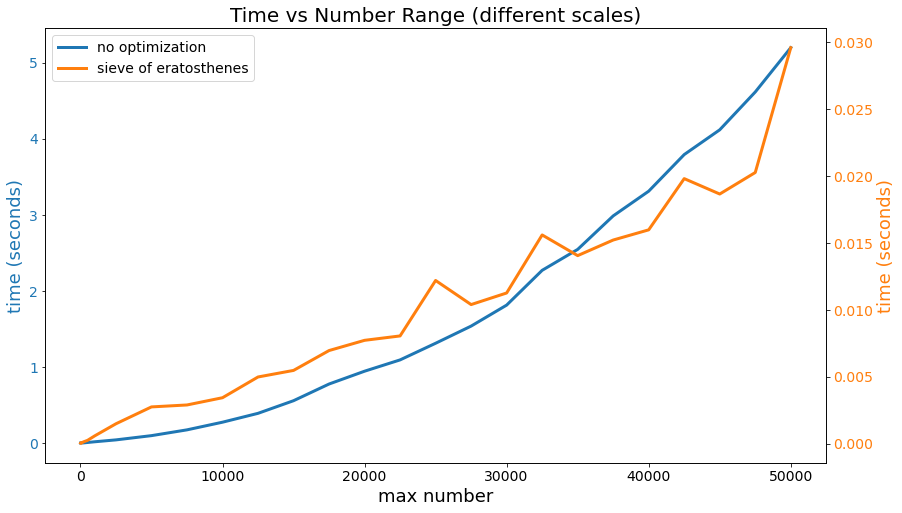

The two trends look similar but have some differences.
I'd say that the two implementation share a N*log(log(N)) time complexity.
Though, the non-optimized one seems to be more 'stable', while the optimized implementation behaves weirdly (but still follows the same trend!)


In [36]:
from timeit import default_timer

# define the range in which prime numbers will be searched
N = 100

def primes(N):
    """function to find prime numbers given upper bound of the search range (lower bound is zero)"""
    
    numbers = np.arange(N)
    mask = np.ones(N, dtype = bool)
    mask[:2] = 0
    
    for i in range(2, N):
        mask[i+1:] = np.logical_and(mask[i+1:], [numbers[i+1:] % i != 0])

    return numbers[mask]

def primes_eratosthenes(N):
    """optimized function"""
    
    numbers = np.arange(N)
    mask = np.ones(N, dtype = bool)
    mask[:2] = 0
    
    # here we have the optimization
    for i in range(2, int(N**0.5)+1):
        for j in range(2*i, N, i):
            mask[j] = False
            
    return numbers[mask]


print("\nUsing no optimization:")
print(primes(N))

print("\nUsing the sieve of Eratosthenes:")
print(primes_eratosthenes(N))

# Now let's check time performances of the two implementations:
# here we define the list of a few upper bounds to our search
nums = [
    10, 
    20, 
    50, 
    100, 
    200, 
    500, 
    1000, 
    2500, 
    5000, 
    7500, 
    10000, 
    12500, 
    15000, 
    17500, 
    20000,
    22500, 
    25000,
    27500, 
    30000, 
    32500,
    35000, 
    37500,
    40000,
    42500,
    45000, 
    47500,
    50000
]


primes_time = []
primes_eratosthenes_time = []
for x in nums:
    # non-optimized function
    start = default_timer()
    primes(x)
    end = default_timer()
    primes_time.append(end - start)
    # optimized function
    start_eratosthenes = default_timer()
    primes_eratosthenes(x)
    end_eratosthenes = default_timer()
    primes_eratosthenes_time.append(end_eratosthenes - start_eratosthenes)

# here we make the plot of the elapsed times vs the upper bound using the same scale to check which one is actually faster
fig, ax = plt.subplots(figsize=(14,8), facecolor="white")
ax.plot(nums, primes_time, color="#1f77b4", lw=3, label="no optimization")
ax.plot(nums, primes_eratosthenes_time, color="#ff7f0e", lw=3, label="sieve of eratosthenes")
ax.set_title("Time vs Number Range (same scale)", fontsize=20)
ax.set_xlabel("max number", fontsize=18)
ax.set_ylabel("time (seconds)", fontsize=18)
ax.tick_params(axis="both", labelsize=14)
ax.legend(fontsize=14)
plt.show()
print("As expected, the optimized implementation is way faster than the non-optimized one!")
print("The divide between the two becomes not negligible when N gets larger than a few tens of thousands.")

# here we make the plot of the elapsed times vs the upper bound using two different scales to check how the two
# implementations scale with N 
fig, ax1 = plt.subplots(figsize=(14,8), facecolor="white")
ax2 = ax1.twinx()
l1 = ax1.plot(nums, primes_time, color="#1f77b4", lw=3, label="no optimization")
l2 = ax2.plot(nums, primes_eratosthenes_time, color="#ff7f0e", lw=3, label="sieve of eratosthenes")
ax1.set_title("Time vs Number Range (different scales)", fontsize=20)
ax1.set_xlabel("max number", fontsize=18)
ax1.set_ylabel("time (seconds)", color="#1f77b4", fontsize=18)
ax2.set_ylabel("time (seconds)", color="#ff7f0e", fontsize=18)
ax1.tick_params(axis="y", labelcolor="#1f77b4")
ax2.tick_params(axis="y", labelcolor="#ff7f0e")
ax1.tick_params(axis="both", labelsize=14)
ax2.tick_params(axis="both", labelsize=14)
lines = l1+l2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=14)
plt.show()

print("The two trends look similar but have some differences.")
print("I'd say that the two implementation share a N*log(log(N)) time complexity.")
print("Though, the non-optimized one seems to be more 'stable', while the optimized implementation behaves weirdly (but still follows the same trend!)")

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider x simple random walk process: at each step in time, x walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of x random walker after x given amount of time. 
To do that, let"s simulate many walkers and create x 2D array with each walker as x raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create x 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as x function of time (step)
  
Did you get what you expected?

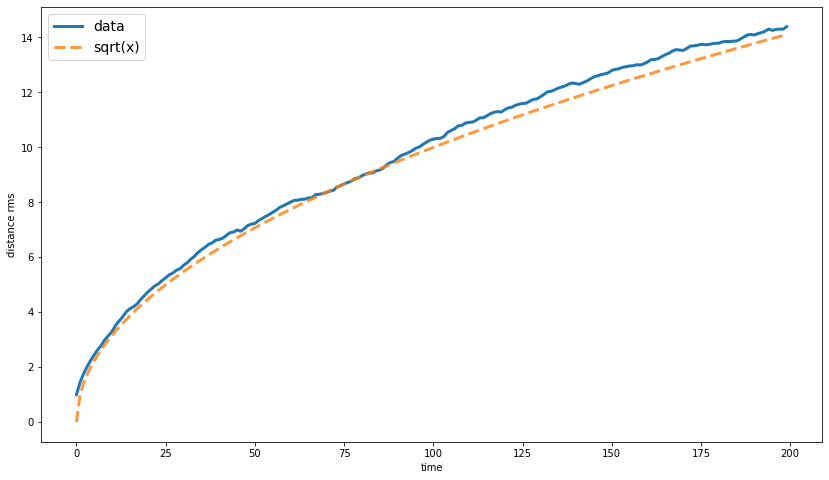

As expected we find a square root trend over time!

This random walk 'experiment' is somehow linked to molecular diffusion in 1D: 
As far as I can remember, the average distance should be proportional to some constant times sqrt(steps)
In this case our steps and the time flowing are identical (n = t / tau where tau, the length of time for one step, is 1)
Without looking for the actual equations and doing the math, I can assume that with our choiches the constant becomes 1 thus <d>=sqrt(n)


In [4]:
N_WALKERS = 1000
STEPS = 200

random_steps = ( np.round( np.random.random( (N_WALKERS, STEPS) ) ).astype(int) )*2 - 1
# print(random_steps)
distance = np.cumsum(random_steps, axis = 1)
d_squared = np.power(distance, 2)
mean_squared = np.mean(d_squared, axis = 0)
root_mean_squared = np.sqrt(mean_squared)

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(np.arange(STEPS), root_mean_squared, color="#1f77b4", lw=3, label="data")
ax.plot(np.arange(STEPS), np.sqrt(np.arange(STEPS)), color="#ff7f0e", lw=3, ls="--", alpha=0.8, label="sqrt(x)")
ax.set_xlabel("time")
ax.set_ylabel("distance rms")
ax.legend(fontsize=14)
plt.show()

print("As expected we find a square root trend over time!\n")
print("This random walk 'experiment' is somehow linked to molecular diffusion in 1D: ")
print("As far as I can remember, the distance rms should be proportional to some constant times sqrt(steps)")
print("In this case our steps and the time flowing are identical (n = t / tau where tau, the length of time for one step, is 1)")
print("Without looking for the actual equations and doing the math, I can assume that with our choiches the constant becomes 1 thus <d>=sqrt(n)")

9\. Analyze x data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into x 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [6]:
dataset = np.loadtxt("populations.txt")
print(dataset)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]



hares mean = 34080.95238095238
hares std = 20897.906458089667

lynxes mean = 20166.666666666668
lynxes std = 16254.591536908763

carrots mean = 42400.0
carrots std = 3322.5062255844787


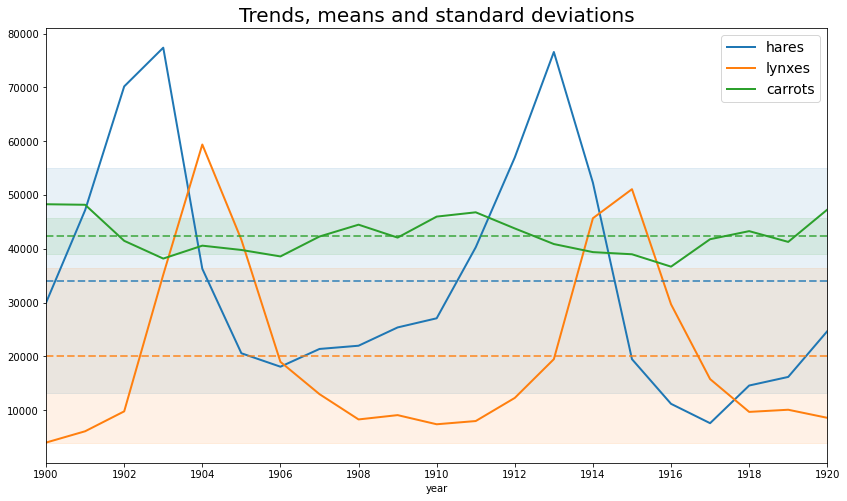

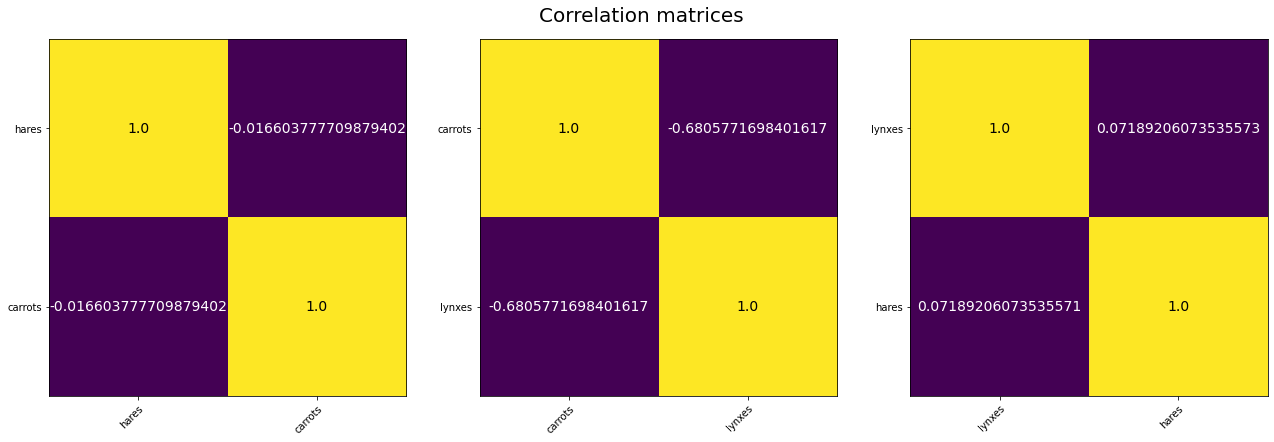

1900: carrots
1901: carrots
1902: hares
1903: hares
1904: lynxes
1905: lynxes
1906: carrots
1907: carrots
1908: carrots
1909: carrots
1910: carrots
1911: carrots
1912: hares
1913: hares
1914: hares
1915: lynxes
1916: carrots
1917: carrots
1918: carrots
1919: carrots
1920: carrots


In [53]:
labels = [
    "hares",
    "lynxes",
    "carrots"
]


colors = [
    "#1f77b4", 
    "#ff7f0e", 
    "#2ca02c"
]

# save the 4 columns into different arrays
years   = dataset[:,0]        
hares   = dataset[:,1]
lynxes  = dataset[:,2]
carrots = dataset[:,3]

# create a list for the 3 features we'll analize
features = [hares, lynxes, carrots]
# compute the mean of the features
means = [np.mean(f) for f in features]
# compute the std of the features
stds = [np.std(f) for f in features]
# compute correlation matrices
hc = np.corrcoef(hares,carrots)
cl = np.corrcoef(carrots,lynxes)
lh = np.corrcoef(lynxes,hares)

# print means and stds
for i in range(len(means)):
    print(f"\n{labels[i]} mean = {means[i]}")
    print(f"{labels[i]} std = {stds[i]}")

# plot the trends with means and stds
fig, ax = plt.subplots(figsize=(14,8))
for i in range(len(features)):     
    ax.plot(years, features[i], lw=2, color=colors[i], label=labels[i])
for i, m in enumerate(means):
    ax.axhline(y=m, color=colors[i], lw=2, ls="--", alpha=0.7)
    ax.fill_between(years, m+stds[i], m-stds[i], color=colors[i], alpha=0.1)
ax.set_xticks(np.arange(years[0], years[-1]+1, 2.0))
ax.set_xlim(years[0], years[-1])
ax.set_xlabel("year")
ax.set_title("Trends, means and standard deviations", fontsize=20)
ax.legend(fontsize=14)
plt.show()

# plot correlation matrices
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
fig.suptitle("Correlation matrices", fontsize=20)

im_0 = ax[0].imshow(hc)
threshold = im_0.norm(hc.max())/2.
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(["hares", "carrots"])
ax[0].set_yticklabels(["hares", "carrots"])
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
textcolors = ["white", "black"]
for i in range(2):
    for j in range(2):
        text = ax[0].text(j, i, hc[i, j], ha="center", va="center", color=textcolors[int(im_0.norm(hc[i, j]) > threshold)], fontsize=14)
        
im_1 = ax[1].imshow(cl)
threshold = im_1.norm(cl.max())/2.
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(["carrots", "lynxes"])
ax[1].set_yticklabels(["carrots", "lynxes"])
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
textcolors = ["white", "black"]
for i in range(2):
    for j in range(2):
        text = ax[1].text(j, i, cl[i, j], ha="center", va="center", color=textcolors[int(im_1.norm(cl[i, j]) > threshold)], fontsize=14)
        
im_2 = ax[2].imshow(lh)
threshold = im_2.norm(lh.max())/2.
ax[2].set_xticks([0, 1])
ax[2].set_yticks([0, 1])
ax[2].set_xticklabels(["lynxes", "hares"])
ax[2].set_yticklabels(["lynxes", "hares"])
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
textcolors = ["white", "black"]
for i in range(2):
    for j in range(2):
        text = ax[2].text(j, i, lh[i, j], ha="center", va="center", color=textcolors[int(im_2.norm(lh[i, j]) > threshold)], fontsize=14)
        
fig.tight_layout()
plt.show()

# highest population per year
populations = dataset[:, 1:]
highest = np.argmax(populations, axis=1)

def assign_label(n):
    if n==0:
        n="hares"
    elif n==1:
        n="lynxes"
    elif n==2:
        n="carrots"
    return n

highest = list(map(assign_label, highest))
summary = list(zip(years.astype(int), highest))

for year, label in summary:
    print(f"{year}: {label}")

We see that we only have a strong negative correlation between carrots and lynxes, while the correlations between hares
and carrots and between lynxes and hares are negligible.

Doesn't really make any sense to me... unless lynxes have become vegetarian without my knowledge! I'd expect that hares
feed on carrots, while lynxes feed on hares!

I am going to look for the following cycle:
* carrots increase
* hares increase
* carrots decrease and lynxes increase
* hares decrese
* loop

We get the first key hint from the trend plot above: hares and lynxes trends follow the same pattern that repeats every
10 years, just shifted by
approximatly 2 years! 

We probably catched the **hares increase &rarr; lynxes increase &rarr; hares decrease** cycle, at it happens with a 2
years rate!

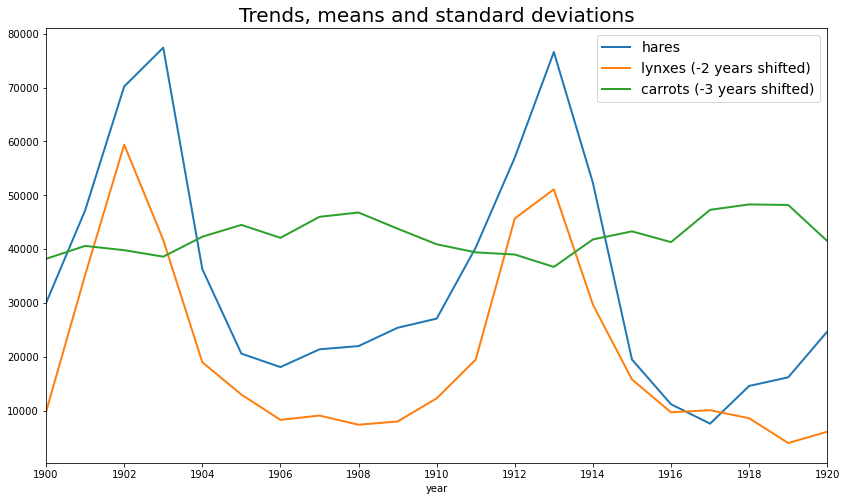

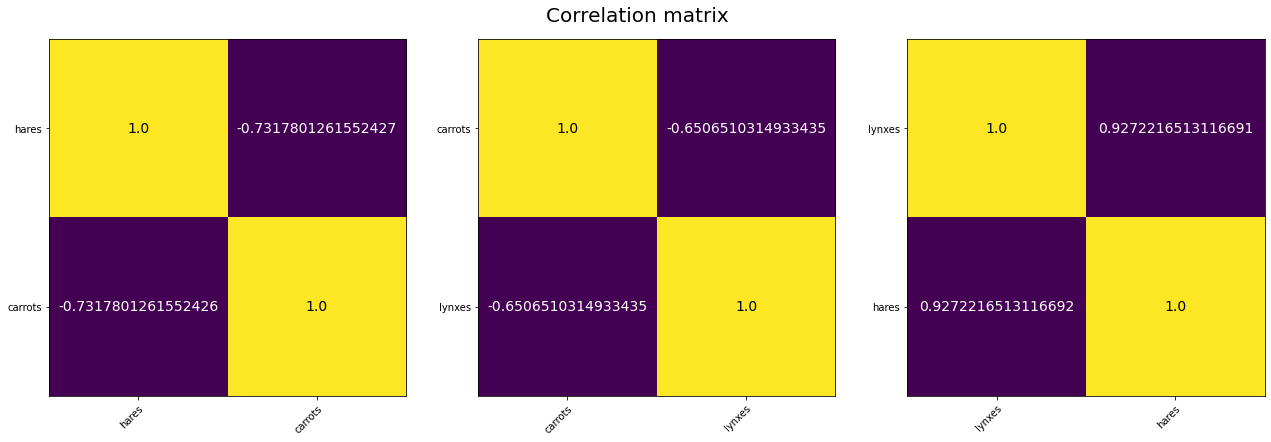

In [45]:
HARES_YEAR_SHIFT    =  0
LYNXES_YEAR_SHIFT   = -2
CARROTS_YEAR_SHIFT  = -3

hares_new   = np.roll(hares, HARES_YEAR_SHIFT)
lynxes_new  = np.roll(lynxes, LYNXES_YEAR_SHIFT)
carrots_new = np.roll(carrots, CARROTS_YEAR_SHIFT)

features_new = [hares_new, lynxes_new, carrots_new]

labels = [
    "hares",
    f"lynxes ({LYNXES_YEAR_SHIFT} years shifted)",
    f"carrots ({CARROTS_YEAR_SHIFT} years shifted)"
]

fig, ax = plt.subplots(figsize=(14,8))
for i in range(len(features_new)):     
    ax.plot(years, features_new[i], lw=2, color=colors[i], label=labels[i])

ax.set_xticks(np.arange(years[0], years[-1]+1, 2.0))
ax.set_xlim(years[0], years[-1])

ax.set_xlabel("year")

ax.set_title("Trends, means and standard deviations", fontsize=20)

ax.legend(fontsize=14)
plt.show()

fig, ax = plt.subplots(ncols=3, figsize=(18,6))
fig.suptitle("Correlation matrix", fontsize=20)

hc = np.corrcoef(hares_new,carrots_new)
cl = np.corrcoef(carrots_new,lynxes_new)
lh = np.corrcoef(lynxes_new,hares_new)

im_0 = ax[0].imshow(hc)
threshold = im_0.norm(hc.max())/2.
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(["hares", "carrots"])
ax[0].set_yticklabels(["hares", "carrots"])
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
textcolors = ["white", "black"]
for i in range(2):
    for j in range(2):
        text = ax[0].text(j, i, hc[i, j], ha="center", va="center", color=textcolors[int(im_0.norm(hc[i, j]) > threshold)], fontsize=14)
        
im_1 = ax[1].imshow(cl)
threshold = im_1.norm(cl.max())/2.
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(["carrots", "lynxes"])
ax[1].set_yticklabels(["carrots", "lynxes"])
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
textcolors = ["white", "black"]
for i in range(2):
    for j in range(2):
        text = ax[1].text(j, i, cl[i, j], ha="center", va="center", color=textcolors[int(im_1.norm(cl[i, j]) > threshold)], fontsize=14)
        
im_2 = ax[2].imshow(lh)
threshold = im_2.norm(lh.max())/2.
ax[2].set_xticks([0, 1])
ax[2].set_yticks([0, 1])
ax[2].set_xticklabels(["lynxes", "hares"])
ax[2].set_yticklabels(["lynxes", "hares"])
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
textcolors = ["white", "black"]
for i in range(2):
    for j in range(2):
        text = ax[2].text(j, i, lh[i, j], ha="center", va="center", color=textcolors[int(im_2.norm(lh[i, j]) > threshold)], fontsize=14)
        
fig.tight_layout()
plt.show()


**WELL NOW IT MAKES MORE SENSE** 

Now we have a strong positive correlation between lynxes and hares (where lynxes are shifted two years back), meaning
that as hares increase lynxes increase with a 2 years delay!

We also have a non-negligible negative correlation between hares and carrots (where carrots are shifted two years back),
meaning that as hares increase carrots decrease with a 3 years delay! 

Finally we have the lynxes and carrots negative correlation that doesn't make sense by itself, but if we refer to the
cycle mentioned above we have that as hares increse we expect that carrots decrease and lynxes increse. Thus lynxes and
carrots should share some kind of negative correlation! The fact that we've found such negative correlation in the first
analysis stresses tha fact that the carrots decrease and the lynxes increse are almost simultaneous: we've found the
same result here because I've shifted both lynxes and carrots back (the former by 2 years, the latter by 3 years)!

My final answer is thus yes, I feel there is some evident correlation here!